
Exercise: Hurricane Michael

    Due No Due Date Points 10 Submitting a website url

Download the hurricaneMichael.csv and US_states(5m).json files (Links to an external site.) for this assignment.

Using the geopandas library, turn the latitude and longitude columns into a geographical Point data type then make a geodataframe. Plot the path of Hurricane Michael onto the US map in the GeoJSON file.

Upload your notebook to Github and submit the URL for this assignment.

Tips

    After loading the US_states(5m).json file as a geodataframe, use the following code to create a geodataframe that only contains the contiguous United States (48 states):

    map48 = map_df.loc[map_df['NAME'].isin(['Alaska', 'Hawaii', 'Puerto Rico']) == False]

    The longitude column data should be turned into negative values(data source listed longitude direction instead of positive/negative). Use the following code to make the data correct:

    michaeldf['Long'] = 0 - michaeldf['Long']

    Feel free to add any additional features to your plot (marker shape, marker color, etc.)


In [2]:
import pandas as pd
import geopandas as gpd #used for transforming geolocation data
import matplotlib.pyplot as plt

from datetime import datetime  #to convert data to datetime that does not fall within the pandas.to_datetime function timeframe
from shapely.geometry import Point  #transform latitude/longitude to geo-coordinate data
from geopandas.tools import geocode #get the latitude/longitude for a given address
from geopandas.tools import reverse_geocode  #get the address for a location using latitude/longitude

%matplotlib inline

In [3]:
location = "datasets/hurricaneMichael.csv"

#load data into dataframe
df = pd.read_csv(location)
df.head()

,AdvisoryNumber,Date,Lat,Long,Wind,Pres,Movement,Type,Name,Received,Forecaster
0,1,10/6/2018 17:00,18.0,86.6,30,1006,NW at 6 MPH (325 deg),Potential Tropical Cyclone,Fourteen,10/6/2018 16:50,Beven
1,1A,10/6/2018 20:00,18.3,86.6,30,1004,N at 6 MPH (360 deg),Potential Tropical Cyclone,Fourteen,10/6/2018 19:32,Avila
2,2,10/6/2018 23:00,18.8,86.6,30,1004,N at 7 MPH (360 deg),Potential Tropical Cyclone,Fourteen,10/6/2018 22:38,Avila
3,2A,10/7/2018 2:00,18.4,87.1,35,1004,NW at 5 MPH (320 deg),Potential Tropical Cyclone,Fourteen,10/7/2018 1:38,Berg
4,3,10/7/2018 5:00,18.6,86.9,35,1004,NNW at 3 MPH (340 deg),Tropical Depression,FOURTEEN,10/7/2018 4:53,Berg


In [4]:
df.count()

AdvisoryNumber    45
Date              45
Lat               45
Long              45
Wind              45
Pres              45
Movement          45
Type              45
Name              45
Received          45
Forecaster        45
dtype: int64

In [6]:
df.dtypes

AdvisoryNumber     object
Date               object
Lat               float64
Long              float64
Wind                int64
Pres                int64
Movement           object
Type               object
Name               object
Received           object
Forecaster         object
dtype: object

In [7]:
df['Long'] = 0 - df['Long']

In [9]:
df['coordinates'] = list(df[['Long', 'Lat']].values)

df['coordinates']

0     [-86.6, 18.0]
1     [-86.6, 18.3]
2     [-86.6, 18.8]
3     [-87.1, 18.4]
4     [-86.9, 18.6]
5     [-86.8, 18.9]
6     [-86.9, 19.2]
7     [-86.9, 19.2]
8     [-85.5, 19.2]
9     [-85.4, 19.9]
10    [-85.4, 20.0]
11    [-85.5, 20.1]
12    [-85.5, 20.6]
13    [-85.1, 20.9]
14    [-84.9, 21.2]
15    [-85.1, 21.7]
16    [-85.2, 22.2]
17    [-85.2, 22.7]
18    [-85.3, 23.2]
19    [-85.7, 23.6]
20    [-85.9, 24.1]
21    [-86.1, 24.5]
22    [-86.2, 25.0]
23    [-86.4, 25.4]
24    [-86.4, 26.0]
25    [-86.5, 26.6]
26    [-86.5, 27.1]
27    [-86.6, 27.7]
28    [-86.5, 28.3]
29    [-86.3, 29.0]
30    [-86.0, 29.4]
31    [-85.5, 30.0]
32    [-85.1, 30.9]
33    [-84.5, 31.5]
34    [-83.8, 32.1]
35    [-83.2, 32.7]
36    [-82.5, 33.5]
37    [-81.8, 34.1]
38    [-80.8, 34.7]
39    [-80.0, 35.7]
40    [-78.8, 36.1]
41    [-77.8, 36.5]
42    [-76.1, 37.1]
43    [-75.1, 37.3]
44    [-73.1, 38.0]
Name: coordinates, dtype: object

In [11]:
#convert to a geolocation type
df['coordinates'] = df['coordinates'].apply(Point)

df['coordinates'].head()

0      POINT (-86.59999999999999 18)
1    POINT (-86.59999999999999 18.3)
2    POINT (-86.59999999999999 18.8)
3    POINT (-87.09999999999999 18.4)
4    POINT (-86.90000000000001 18.6)
Name: coordinates, dtype: object

In [13]:
df['coordinates'].dtypes

dtype('O')

In [15]:
type(df['coordinates'])

pandas.core.series.Series

In [17]:
geo_hurricane = gpd.GeoDataFrame(df, geometry = 'coordinates')

geo_hurricane.head()

,AdvisoryNumber,Date,Lat,Long,Wind,Pres,Movement,Type,Name,Received,Forecaster,coordinates
0,1,10/6/2018 17:00,18.0,-86.6,30,1006,NW at 6 MPH (325 deg),Potential Tropical Cyclone,Fourteen,10/6/2018 16:50,Beven,POINT (-86.60000 18.00000)
1,1A,10/6/2018 20:00,18.3,-86.6,30,1004,N at 6 MPH (360 deg),Potential Tropical Cyclone,Fourteen,10/6/2018 19:32,Avila,POINT (-86.60000 18.30000)
2,2,10/6/2018 23:00,18.8,-86.6,30,1004,N at 7 MPH (360 deg),Potential Tropical Cyclone,Fourteen,10/6/2018 22:38,Avila,POINT (-86.60000 18.80000)
3,2A,10/7/2018 2:00,18.4,-87.1,35,1004,NW at 5 MPH (320 deg),Potential Tropical Cyclone,Fourteen,10/7/2018 1:38,Berg,POINT (-87.10000 18.40000)
4,3,10/7/2018 5:00,18.6,-86.9,35,1004,NNW at 3 MPH (340 deg),Tropical Depression,FOURTEEN,10/7/2018 4:53,Berg,POINT (-86.90000 18.60000)


In [19]:
filepath = "US_states(5m).json"

map_df = gpd.read_file(filepath)
map_df.head()

,GEO_ID,STATE,NAME,LSAD,CENSUSAREA,geometry
0,0400000US01,01,Alabama,,50645.326,"MULTIPOLYGON (((-88.12466 30.28364, -88.08681 ..."
1,0400000US02,02,Alaska,,570640.950,"MULTIPOLYGON (((-166.10574 53.98861, -166.0752..."
2,0400000US04,04,Arizona,,113594.084,"POLYGON ((-112.53859 37.00067, -112.53454 37.0..."
3,0400000US05,05,Arkansas,,52035.477,"POLYGON ((-94.04296 33.01922, -94.04304 33.079..."
4,0400000US06,06,California,,155779.220,"MULTIPOLYGON (((-122.42144 37.86997, -122.4213..."


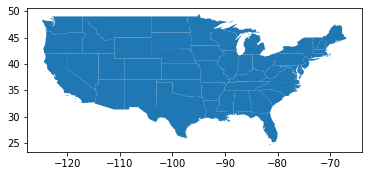

In [21]:
map48 = map_df.loc[map_df['NAME'].isin(['Alaska', 'Hawaii', 'Puerto Rico']) == False]

map48.plot()

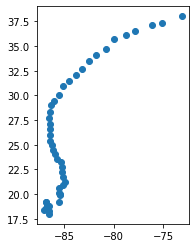

In [22]:
geo_hurricane.plot()

Text(0.5, 1, 'Trajectory of Hurricane Michael 2018')

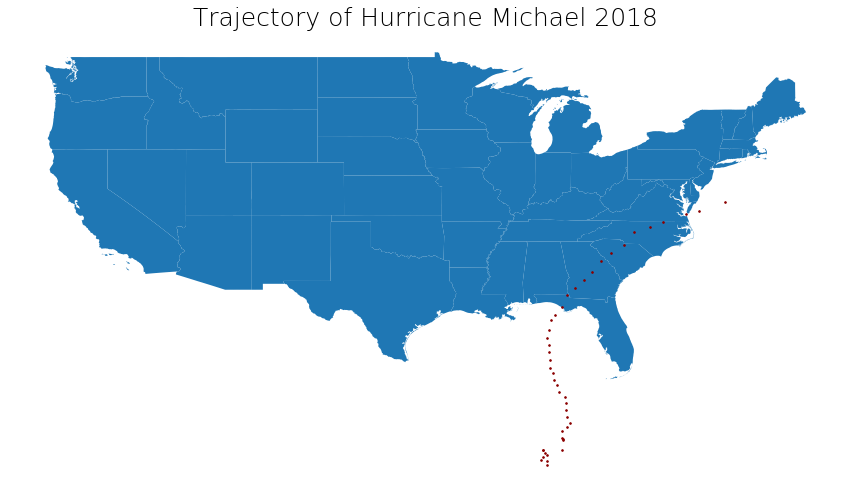

In [24]:
#plot coordinates on top of map graph

#this is to set the size of the borders
fig, ax = plt.subplots(1, figsize=(15,10))

#this is the map
basemap = map48.plot(ax=ax)

#plot coordinates on top of map graph
geo_hurricane.plot(ax=basemap, color='darkred', marker=".", markersize=10)

#take off axis numbers
ax.axis('off')

#put title on map
ax.set_title("Trajectory of Hurricane Michael 2018", fontsize=25, fontweight=3)